
*   TRABAJAREMOS SOBRE UN DATASET CON DATOS DE vinos.
*   Se llama Wine y está en el repositorio de datos de la UCI.
*   Tiene 178 muestras de 3 tipos diferentes de uvas cultivadas en la misma región italiana pero procedentes de distintos viñedos, descritas por 13 características.
*   LA IDEA ES APRENDER A RECONOCER LAS CARACTERÍSTICAS DE LOS tres tipos de uvas, APRENDIENDO DE LAS CARACTERÍSTICAS DEL DATASET.

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names 

In [ ]:
# CARGAMOS LAS LIBRERÍAS QUE USAREMOS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve



In [ ]:
# SUBIMOS Y CARGAMOS EL DATASET
vino = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
vino.columns=['class_label','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
              'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
              'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print(f'Forma: {vino.shape}')
print(f'Columnas: {vino.columns}')
vino

Forma: (178, 14)
Columnas: Index(['class_label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


,class_label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class_label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
vino.describe().T

,count,mean,std,min,25%,50%,75%,max
class_label,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [ ]:
# VEMOS SI HAY VALORES NULL O NaN
print(f"¿Tiene datos en null o NaN? {vino.isnull().any().any()}")
print("¿Qué columnas poseen null o NaN?")
display(vino.isnull().any())

¿Tiene datos en null o NaN? False
¿Qué columnas poseen null o NaN?


class_label                     False
Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
dtype: bool

In [ ]:
# VEAMOS QUÉ VALORES HAY EN 'class_label'
print(vino['class_label'].unique())


[1 2 3]


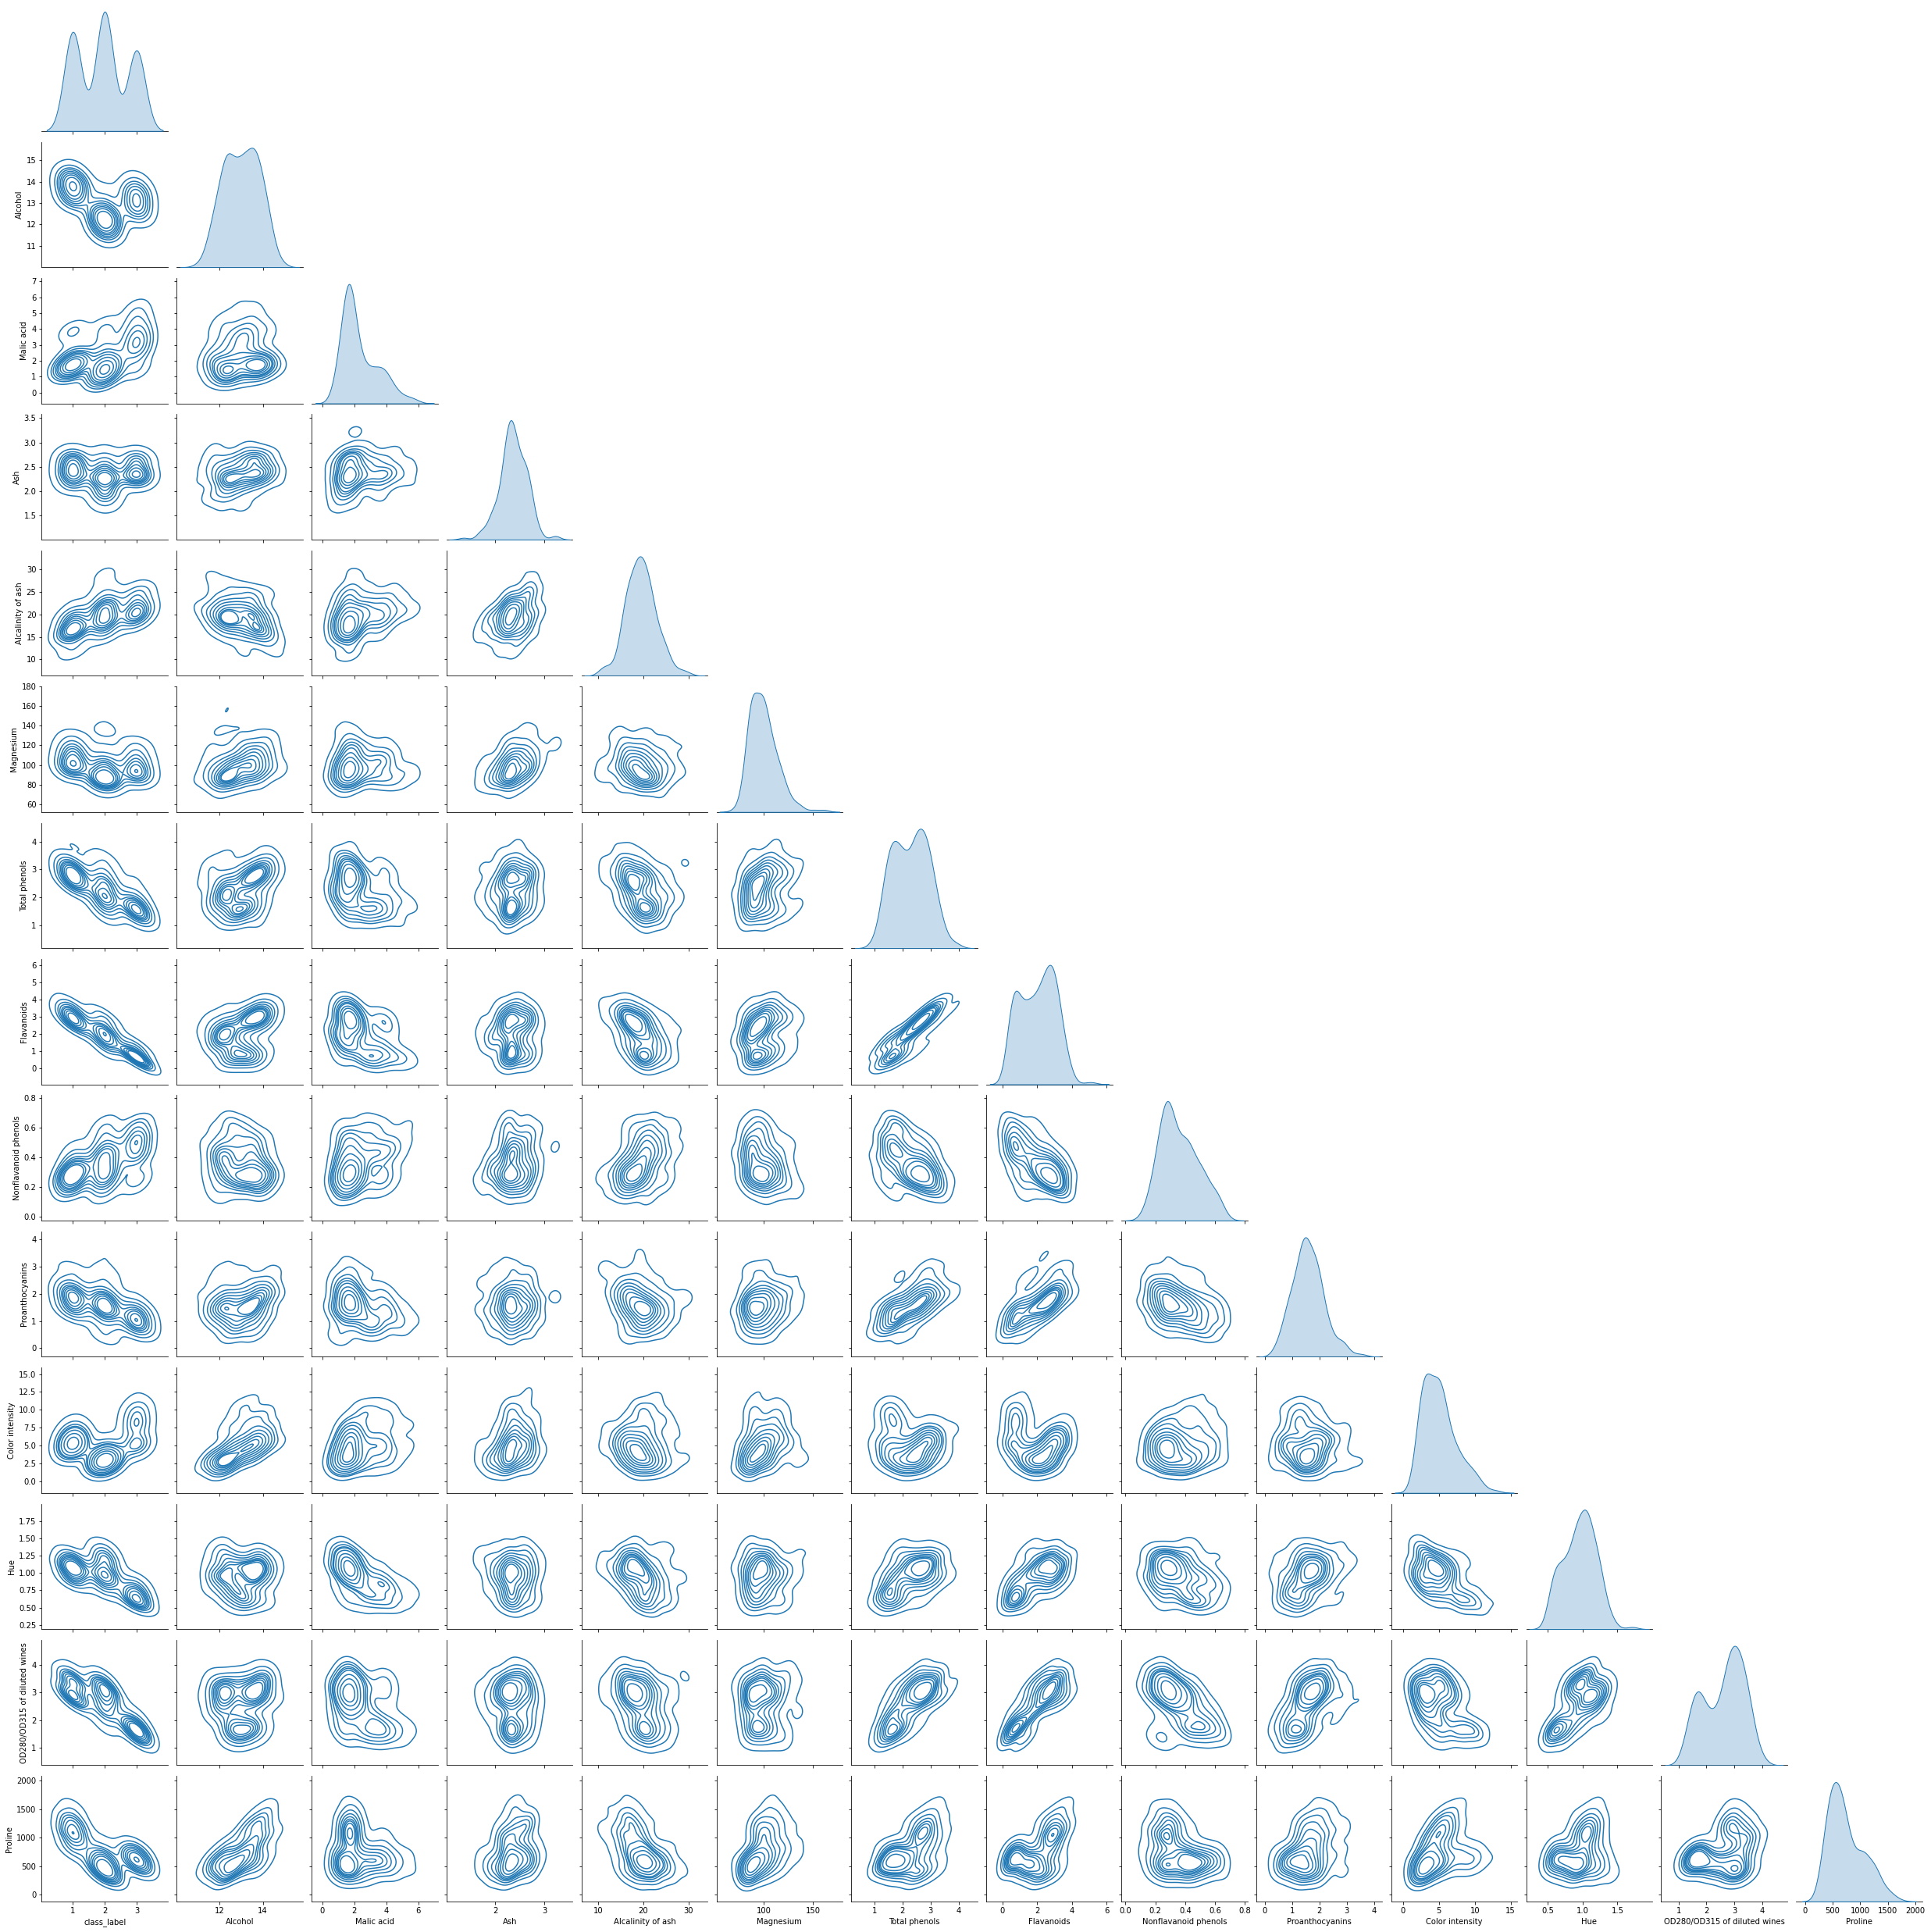

In [ ]:
# VEMOS COMO 'se ve' EL DATASET
sns.pairplot(vino, kind='kde', corner=True)  # tarda un montón

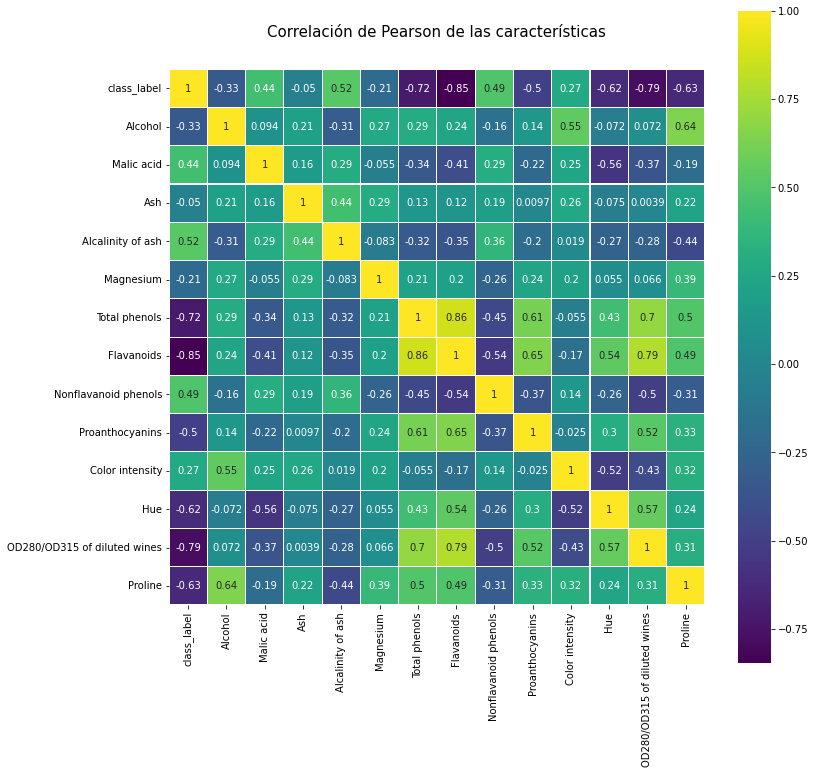

In [ ]:
# Veamos si hay correlaciones
colormap = plt.cm.viridis   # mapa de colores
plt.figure(figsize = (12,12))
plt.title('Correlación de Pearson de las características', y = 1.05, size = 15)
sns.heatmap(vino.corr(), linewidths = 0.1, vmax = 1.0, square = True,
            cmap = colormap,linecolor = 'white', annot = True)
plt.show()


class_label
1    59
2    71
3    48
dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


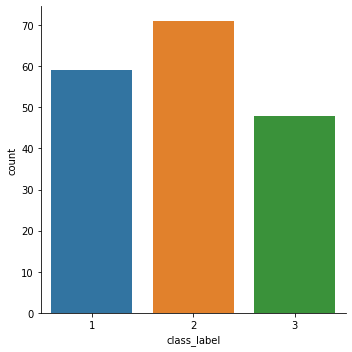

In [ ]:
# Veamos como están distribuidas la categoría target 'class_label'
print(vino.groupby('class_label').size())
sns.catplot('class_label', data = vino, kind = "count")

In [ ]:
# Está listo el dataset para buscar y entrenar modelos
# Falta estandarizar las características
# Vamos a usar un sencillo modelo, una regresión logística 
# Armaremos un pipeline, pero primero separamos en train y test
# Vamos a aplicar cross validation, así que separamos el dataset en 'train' y 'test' solamennte
# Copiamos el dataframe original para no perder nada en otro y trabajamos sobre el otro

vinos=vino.copy()   # lo preservamos
y=np.array(vinos['class_label'])    # definimos variable target
X=np.array(vinos.drop(['class_label'],1))   # definimos dataset de características puras
# stratify=y hace que respete la distribución de las clases en y para muestrear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, 
                                                    random_state = 6)   

<ipython-input-32-bfa1be314fa0>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(vinos.drop(['class_label'],1))   # definimos dataset de características puras


In [ ]:
# Definimos la pipeline para la regresión logística
# class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
# intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0,
# warm_start=False, n_jobs=None, l1_ratio=None)
# Dejamos los parámetros default, sólo tocamos random_state y n_jobs
pipe_log=make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=16, n_jobs=-1))
pipe_log.fit(X_train, y_train)   # entrenamos sobre el cjto de entrenamiento
y_pred_log=pipe_log.predict(X_test)

tn, fp, fn, tp = [12  0  0  0 13  1  0  0 10]
Val_accuracy= 100.0%


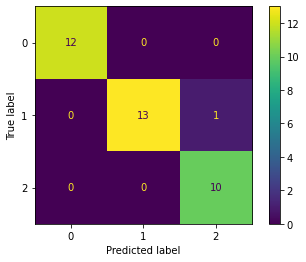

In [ ]:
# Veamos qué obtuvimos, a través de la matriz de confusión
print(f'tn, fp, fn, tp = {confusion_matrix(y_test, y_pred_log).ravel()}')
# ahora más 'bonita'
conf1 = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(conf1).plot()
print(f'Val_accuracy= {100*pipe_log.score(X_test, y_test)}%')


In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True,
                        random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_log.fit(X_train[train], y_train[train])
    score = pipe_log.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold:  1, Class dist.: [ 0 42 51 34], Acc: 1.000
Fold:  2, Class dist.: [ 0 42 51 34], Acc: 1.000
Fold:  3, Class dist.: [ 0 42 52 34], Acc: 1.000
Fold:  4, Class dist.: [ 0 42 52 34], Acc: 1.000
Fold:  5, Class dist.: [ 0 42 52 34], Acc: 1.000
Fold:  6, Class dist.: [ 0 42 51 35], Acc: 1.000
Fold:  7, Class dist.: [ 0 42 51 35], Acc: 1.000
Fold:  8, Class dist.: [ 0 43 51 34], Acc: 0.929
Fold:  9, Class dist.: [ 0 43 51 34], Acc: 1.000
Fold: 10, Class dist.: [ 0 43 51 34], Acc: 0.929

CV accuracy: 0.986 +/- 0.029


In [ ]:
scores = cross_val_score(estimator=pipe_log,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy scores: [1.         1.         1.         1.         1.         1.
 0.92857143 1.         1.         1.        ]
CV accuracy: 0.993 +/- 0.021


tn, fp, fn, tp = [12  0  0  0 13  1  0  0 10]
Val_accuracy= 100.0%


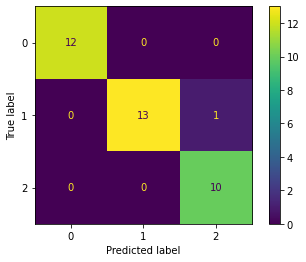

In [ ]:
# Veamos qué obtuvimos, a través de la matriz de confusión
print(f'tn, fp, fn, tp = {confusion_matrix(y_test, y_pred_log).ravel()}')
# ahora más 'bonita'
conf1 = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(conf1).plot()
print(f'Val_accuracy= {100*pipe_log.score(X_test, y_test)}%')

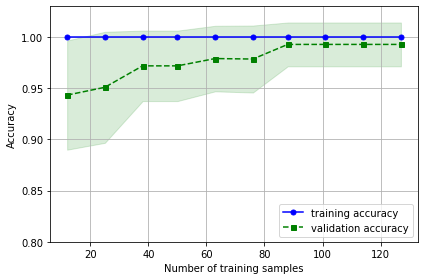

In [ ]:
# Veamos la curva de aprendizaje del modelo
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_log,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()



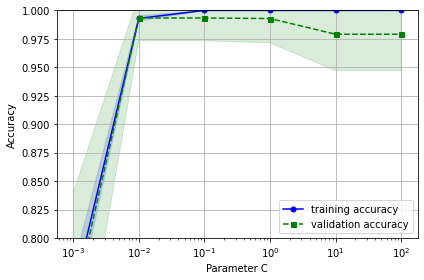

In [ ]:
# Resolver el sobreajuste y el subajuste con curvas de validación
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_log, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [ ]:
# ## Ajustar hiperparámetros con la búsqueda de cuadrículas 
# class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False,
# tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'{gs.best_score_*100} %')
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))


99.28571428571429 %
{'svc__C': 1.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Test accuracy: 0.944
